In [2]:
# Data Manipulation
import pandas as pd

# Linear Algebra
import numpy as np

# Text Processing
import re # Regular Expressions
import nltk # nltk: Natural Language Toolkit
import string # For punctuation
# Import API (i.e. stopwords) for pulling a list of common words to remove
from nltk.corpus import stopwords
# Download stopwords list
# nltk.download('stopwords') # once is enough; for production, this line can be commented out
from nltk.stem import WordNetLemmatizer
# Download WordNet data
# nltk.download('wordnet') # once is enough; for production, this line can be commented

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
# !pip install wordcloud
from wordcloud import WordCloud

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Deep Learning + Vectorization
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Bidirectional

In [30]:
# Algorithm Example of Special Characters Treatment in Text Tokenization
text = 'Movie/ was fantastic! I really <loved> it and wo*ld wa//ch it ag&in.'
text.split() #delimiter was space & special chr and punctuation are treated as part of the word

'''
Revise concepts:

1) pad_sequences makes all sequences the same length so neural networks can process them.
   Hence needed for RNNs, LSTMs, CNNs, Transformers as they require fixed-size input tensors and padding solves variable-length text.

2)
Encoding vs Padding vs Vectorization (very important)

These are different concepts:

Concept	            What it does
Encoding (UTF-8)	Converts characters to bytes
Tokenization	    Splits text
Vectorization	    Converts tokens to numbers
Padding	Equalizes   sequence lengths

'''

'\nRevise concepts:\n\n1) pad_sequences makes all sequences the same length so neural networks can process them.\n   Hence needed for RNNs, LSTMs, CNNs, Transformers as they require fixed-size input tensors and padding solves variable-length text.\n\n2)\nEncoding vs Padding vs Vectorization (very important)\n\nThese are different concepts:\n\nConcept\t            What it does\nEncoding (UTF-8)\tConverts characters to bytes\nTokenization\t    Splits text\nVectorization\t    Converts tokens to numbers\nPadding\tEqualizes   sequence lengths\n\n'

# Lemmatization in NLP (Text Analytics)

## Definition
**Lemmatization** is a text normalization technique in NLP that reduces words to their **base (dictionary) form**, called a **lemma**, while preserving the word’s **actual meaning**.

It is used to make text analytics models more **consistent, compact, and meaningful**.

---

## 1️⃣ What Lemmatization Does (Simple Idea)

It converts different forms of a word into **one canonical form**.

### Examples

| Original Word | Lemma |
|--------------|-------|
| running | run |
| runs | run |
| ran | run |
| better | good |
| children | child |
| studies | study |

### Without lemmatization
- `"run"`, `"running"`, `"ran"` are treated as **different features**

### With lemmatization
- All are converted to **`"run"`**

---

## 2️⃣ Why Lemmatization Matters in Text Analytics

### 🔹 Reduces dimensionality
- Fewer unique tokens  
- Smaller feature space  
- Faster training  

### 🔹 Improves statistical learning
- Counts / TF-IDF become more meaningful  
- Reduces sparsity  

### 🔹 Preserves meaning
- Unlike stemming, lemmatization uses **vocabulary + grammar rules**

---

## 3️⃣ Lemmatization vs Stemming (VERY IMPORTANT)

| Aspect | Lemmatization | Stemming |
|------|--------------|----------|
| Output | Real words | Often broken words |
| Linguistic rules | Yes | No |
| Accuracy | High | Lower |
| Speed | Slower | Faster |
| Example | better → good | better → bett |

### Example comparison
```text
Stemming:      "studies" → "studi"
Lemmatization: "studies" → "study"
```

👉 **For professional NLP, lemmatization is preferred.**

---

## 4️⃣ How Lemmatization Works (Under the Hood)

Lemmatizers rely on:

- Part-of-Speech (POS) tagging  
- Dictionaries  
- Morphological analysis  

### Example
- `"running"` (verb) → `"run"`  
- `"running"` (noun) → `"running"`  

Meaning is preserved based on **context**.

---

## 5️⃣ When to Use Lemmatization

### ✅ Use it when:
- Using **Bag-of-Words / TF-IDF**
- Dataset is **small to medium**
- You want **interpretability**
- Using **classical ML models**  
  (Naive Bayes, SVM, Logistic Regression)

### ⚠️ Optional / Avoid when:
- Using **transformers** (BERT, RoBERTa)
- You want **raw context**
- You have **large datasets**

> Transformers already handle morphology internally.

### Example
```py
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

lemmatizer.lemmatize("running", pos=wordnet.VERB)  # 'run'
lemmatizer.lemmatize("better", pos=wordnet.ADJ)    # 'good'
```

In [2]:
# Load dataset
df = pd.read_csv('IMDB Dataset.csv')
df.info()
df.head() #consists special chr and punc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df['sentiment'].value_counts()
# positive and negative are balanced (each 25000)

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

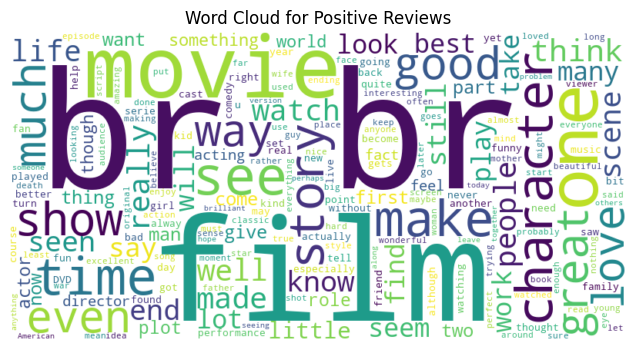

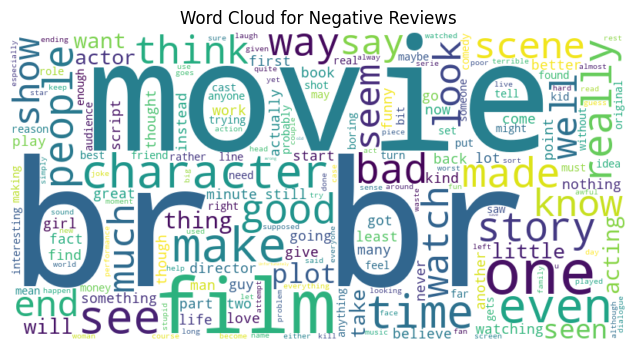

In [22]:
# Data Visualization

# Word Cloud Visualization
def wordcloud_viz(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(data)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word cloud for positive reviews
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['review'])
wordcloud_viz(positive_reviews, 'Word Cloud for Positive Reviews')
# Generate word cloud for negative reviews
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['review'])
wordcloud_viz(negative_reviews, 'Word Cloud for Negative Reviews')


In [3]:
# Recode sentiment to binary
df['target'] = np.where(df['sentiment'] == 'positive', 1, 0)
df.head()
# or using le = LabelEncoder() to fit transform X_train = df['review']']

,review,sentiment,target
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [4]:
# Data Preprocessing (Cleaning, Tokenization, Lemmatization)
punc = string.punctuation
stop_words = set(stopwords.words('english'))

# Lemmatization
lemm = WordNetLemmatizer()

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', punc))
    # Remove special characters and digits
    text = re.sub(r'[^a-z\s]', '', text) # ^ means NOT \s means space & \d means digit
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords and Lemmatization
    text = ' '.join([lemm.lemmatize(word) for word in text.split() if word not in stop_words]) # ' ' is for spacing after join
    return text

# Apply cleaning function to the 'review' column
df['cleaned_review'] = df['review'].apply(clean_text)
df.head()

,review,sentiment,target,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,1,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,positive,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,0,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter matteis love time money visually stunni...


# Text Vectorization Methods (NLP Reference)

---

## 1️⃣ Count-based Vectorizers
Convert text into vectors based on **raw word counts**.

### Common Methods
- **Bag of Words (BoW)**  
  - Raw word frequency counts
- **CountVectorizer (sklearn)**  
  - BoW with configurable options (n-grams, `min_df`, `max_df`)

### Characteristics
- Simple and fast
- Highly interpretable
- High-dimensional sparse vectors
- No semantic understanding

---

## 2️⃣ Frequency-based Vectorizers
Account for **word importance across documents**.

### Common Methods
- **TF-IDF (Term Frequency–Inverse Document Frequency)**
- **TfidfVectorizer (sklearn)**
- **TfidfTransformer**

### Characteristics
- Sparse representations
- Strong baseline for NLP tasks
- Works very well with Logistic Regression and SVM
- No semantic meaning, only statistical importance

---

## 3️⃣ Hashing-based Vectorizers
Use the **hashing trick** instead of storing a vocabulary.

### Common Method
- **HashingVectorizer**

### Characteristics
- Memory efficient
- No vocabulary storage required
- Risk of hash collisions
- Suitable for large-scale or streaming data

---

## 4️⃣ Word Embedding Vectorizers
Dense vectors that capture **semantic meaning**.

### Classic Embeddings
- **Word2Vec**
- **GloVe**
- **FastText**

### Usage Approaches
- Average word vectors
- TF-IDF weighted embeddings
- Sequence models (LSTM, CNN)

### Characteristics
- Dense, low-dimensional vectors
- Capture semantic relationships
- Higher computational cost
- Significantly better than BoW for meaning

---

## 5️⃣ Document / Sentence Embeddings
Vectorize **entire sentences or documents** directly.

### Examples
- **Doc2Vec**
- **Universal Sentence Encoder (USE)**
- **Sentence-BERT (SBERT)**

### Characteristics
- Fixed-length dense vectors
- Capture sentence-level context
- Excellent for similarity, clustering, and retrieval tasks

---

## 6️⃣ Contextual Transformer-based Vectorizers
State-of-the-art **context-aware** representations.

### Examples
- **BERT**
- **RoBERTa**
- **DistilBERT**
- **ALBERT**
- **GPT Embeddings**

### Characteristics
- Context-aware word representations
- Best performance on complex NLP tasks
- Computationally expensive
- Minimal text preprocessing required

---

## 7️⃣ Character-level Vectorizers
Useful for **noisy text**, typos, slang, and rare words.

### Examples
- Character n-grams
- Character-level TF-IDF
- **FastText** (subword embeddings)

### Characteristics
- Robust to spelling variations
- Handles out-of-vocabulary words well
- Useful for informal or multilingual text

In [5]:
# Data Partitioning
X = df['cleaned_review'].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)

tfidf = vectorizer.fit(X_train)
X_train_vect = tfidf.transform(X_train)

mnb = MultinomialNB(alpha=0.1)
mnb.fit(X_train_vect, y_train)

X_test_vect = tfidf.transform(X_test)
y_pred = mnb.predict(X_test_vect)
print(classification_report(y_test, y_pred)) # accuracy 85%

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      5044
           1       0.85      0.86      0.85      4956

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


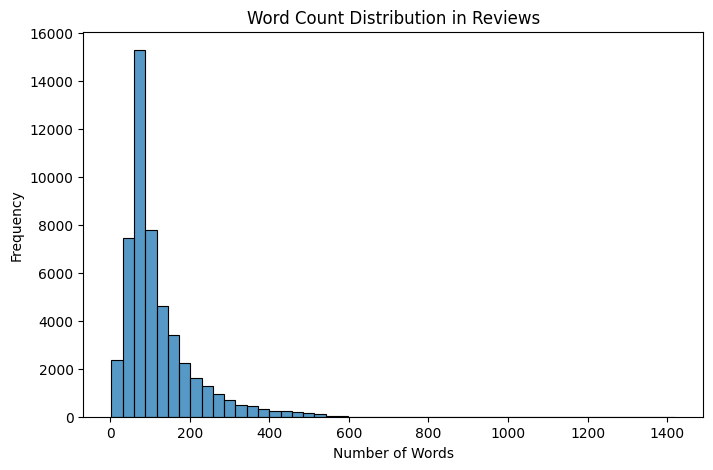

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


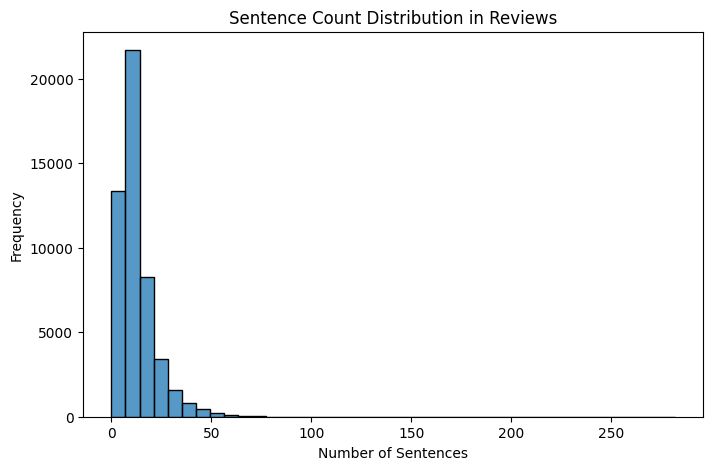

In [7]:
# Word count and Senctence count distribution
df['word_count'] = df['cleaned_review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,5))
sns.histplot(df['word_count'], bins=50)
plt.title("Word Count Distribution in Reviews")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

df['sentence_count'] = df['review'].apply(lambda x: len(re.split(r'[.!?]+', x)) - 1)
plt.figure(figsize=(8,5))
sns.histplot(df['sentence_count'], bins=40)
plt.title("Sentence Count Distribution in Reviews")
plt.xlabel("Number of Sentences")
plt.ylabel("Frequency")
plt.show()

In [8]:
df['word_count'].describe()
# word distribution postive skewed, mean = 118, median 88, std = 89.27, 25% and 75% percentiles = 64 and 144 (max words: 1420)

# vocab size is Number of unique words the model is allowed to learn.
# max length is the maximum number of tokens per review (i.e. when padding, each row in 50000 reviews will have this length)
vocab_size = 30000
max_length = 200
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
# Intuition: model input is a (50,000 × 200) matrix, where each row represents a review padded or truncated to 200 tokens
# where future model can learn up to 30,000 unique words from the training data

X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

In [9]:
# Build Deep Learning Model from scratch
model = Sequential() # sequential initiates a linear stack of layers, i.e. container or model architecture
# Intuition of a simplest NN model: model.add(Dense(units= , activation= )) -> forms regression or logistic for tabular data

'''
random NN model using Dense layers would be like below:
model.add(Dense(128, activation='relu', input_shape=(max_length,))) # input layer
# where Dense layer is fully connected layer, activation relu introduces non-linearity, 128 neurons
model.add(Dropout(0.5)) # Dropout layer for regularization, 0.5 means 50% neurons randomly dropped during training to prevent overfitting
model.add(Dense(64, activation='relu')) # hidden layer
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # output layer for binary classification
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# loss function binary_crossentropy for binary classification, adam optimizer for efficient training
model.summary() # neurons decrease from 128 to 64 to 1 because of feature extraction and final binary output
'''

# For text, purpose is to capture memory of sequences, hence RNNs or LSTMs are preferred
# RNNs introduce memory to handle sequential data but only short term, hence LSTMs are part of RNNs where tht fix this issue
embedding_dim = 100 # Converts each word index into a dense vector, where its semantic richness usually 50-300
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
# since open-ended input, Embedding instead of Dense is used above
model.add(Bidirectional(LSTM(128, return_sequences=True))) #BiLSTM reads sequences both forward and backward
model.add(Dropout(0.2)) # Rule of thumb: 0.2 or 0.3 to prevent memory loss not 0.5 cuz purpose for text is capture memory
model.add(Bidirectional(LSTM(64))) # BiLSTM layer with 64 units gives 128 features = 2 layers of LSTM()
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

c:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Better codding style of buidling the model which is equivalent to above
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),

    Bidirectional(LSTM(128, return_sequences=True, dropout=0.2)),
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.2)),

    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [10]:
# Train model
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))
# Epochs: one complete pass through the entire training set; batch_size: no of samples processed before model or its weights updated

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 257s 406ms/step - accuracy: 0.7472 - loss: 0.5047 - val_accuracy: 0.8512 - val_loss: 0.3657
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 4111s 7s/step - accuracy: 0.8973 - loss: 0.2750 - val_accuracy: 0.8822 - val_loss: 0.2926
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 243s 389ms/step - accuracy: 0.9482 - loss: 0.1535 - val_accuracy: 0.8728 - val_loss: 0.3173
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 248s 397ms/step - accuracy: 0.9712 - loss: 0.0947 - val_accuracy: 0.8725 - val_loss: 0.3705
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1018s 2s/step - accuracy: 0.9798 - loss: 0.0681 - val_accuracy: 0.8668 - val_loss: 0.4341


In [ ]:
# Evaluate model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f'Test Accuracy: {accuracy}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Conclusion: DL model (LSTM) gives slightly better accuracy (~86%) than ML model (Naive Bayes) (~85%) for this dataset.
# Since loss plot is most important to check overfitting or underfitting and accuracy plot only supplements it,
# we can see that after epoch 1, validation loss starts decreasing hence overfitting is suspected.
# another way aside from fine tuning hyperparameters is to introduce early stopping callback during model training to halt training.

In [5]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
# patience=2 means training stops if val_loss doesn't improve for 2 consecutive epochs
# restore_best_weights=True ensures the model retains the weights from the epoch with the best validation loss